## Title & Objective
# Coffee Sales
> **Author:** Veer  
 **Role:** Data Analyst & Data scientist  
 **Tools:** Python, ML (Machine Learning)  
 **Libraries:** NumPy, Pandas, Matplotlib, Seaborn, Scikit-learn, Warnings  
 **Objective:** This dataset contains detailed records of coffee sales from a vending machine.
The dataset spans from March 2024 to Present time, capturing daily transaction
data. In this notebook, we are going to use EDA and ML model to discover the customer's
purchasing patterns, sales trends and predictive modeling which can aid in the inventory planning.  

## Index / Table of Contents
### Notebook Index
1. Import Libraries
2. Load Dataset
3. Data Structure
4. Data Cleaning & Preprocessing
5. Exploratory Data Analysis (EDA)
6. Feature Engineering
7. Model Building
8. Model Evaluation
9. Key Insights

## Import Libraries

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

## Load The Dataset

In [2]:
# import data
df = pd.read_csv("coffee_sales.csv")
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
1128,2024-07-31,2024-07-31 20:53:35.077,card,ANON-0000-0000-0443,23.02,Cortado
1129,2024-07-31,2024-07-31 20:59:25.013,card,ANON-0000-0000-0040,27.92,Americano with Milk
1130,2024-07-31,2024-07-31 21:26:26.000,card,ANON-0000-0000-0444,32.82,Latte
1131,2024-07-31,2024-07-31 21:54:11.824,card,ANON-0000-0000-0445,32.82,Latte


## Data Structure

In [4]:
df.shape

(1133, 6)

- Data consist 1133 rows and 6 columns.

In [6]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


- Here we have 5 object/string and 1 float columns.

In [8]:
# checking data types
df.dtypes

date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object

In [9]:
# statistical summary of data ; For numerical data
df.describe()

,money
count,1133.000000
mean,33.105808
std,5.035366
min,18.120000
25%,28.900000
50%,32.820000
75%,37.720000
max,40.000000


In [10]:
# statistical summary of data ; For categorical data
df[["cash_type","card","coffee_name"]].describe()

,cash_type,card,coffee_name
count,1133,1044,1133
unique,2,446,8
top,card,ANON-0000-0000-0012,Americano with Milk
freq,1044,88,268


## Data Cleaning

In [12]:
# looking for duplicate values
df.duplicated().sum()

0

- There's no duplicate values in dataset

In [14]:
# checking null values
df.isna().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

- In card column we have 89 null values present.

In [16]:
# convert to datetime format
df["date"] = pd.to_datetime(df["date"])
df["datetime"] = pd.to_datetime(df["datetime"])

In [17]:
# extrecting year, month, day and hour
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day
df["hour"] = df["datetime"].dt.hour

In [18]:
df.head()

,date,datetime,cash_type,card,money,coffee_name,year,month,day,hour
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,2024,3,1,10
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3,1,12
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,2024,3,1,12
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,2024,3,1,13
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,2024,3,1,13


In [19]:
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
year                    int32
month                   int32
day                     int32
hour                    int32
dtype: object

## EDA (Exploratory Data Analysis)

In [21]:
# maximum and minunum duration 
df["date"].min(),df["date"].max()

(Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00'))

- Dataset we have is from ``01-03-2024`` to ``31-07-2024``

In [23]:
# looking for payment mode/cash type
payment_type = df["cash_type"].value_counts()
payment_type

cash_type
card    1044
cash      89
Name: count, dtype: int64

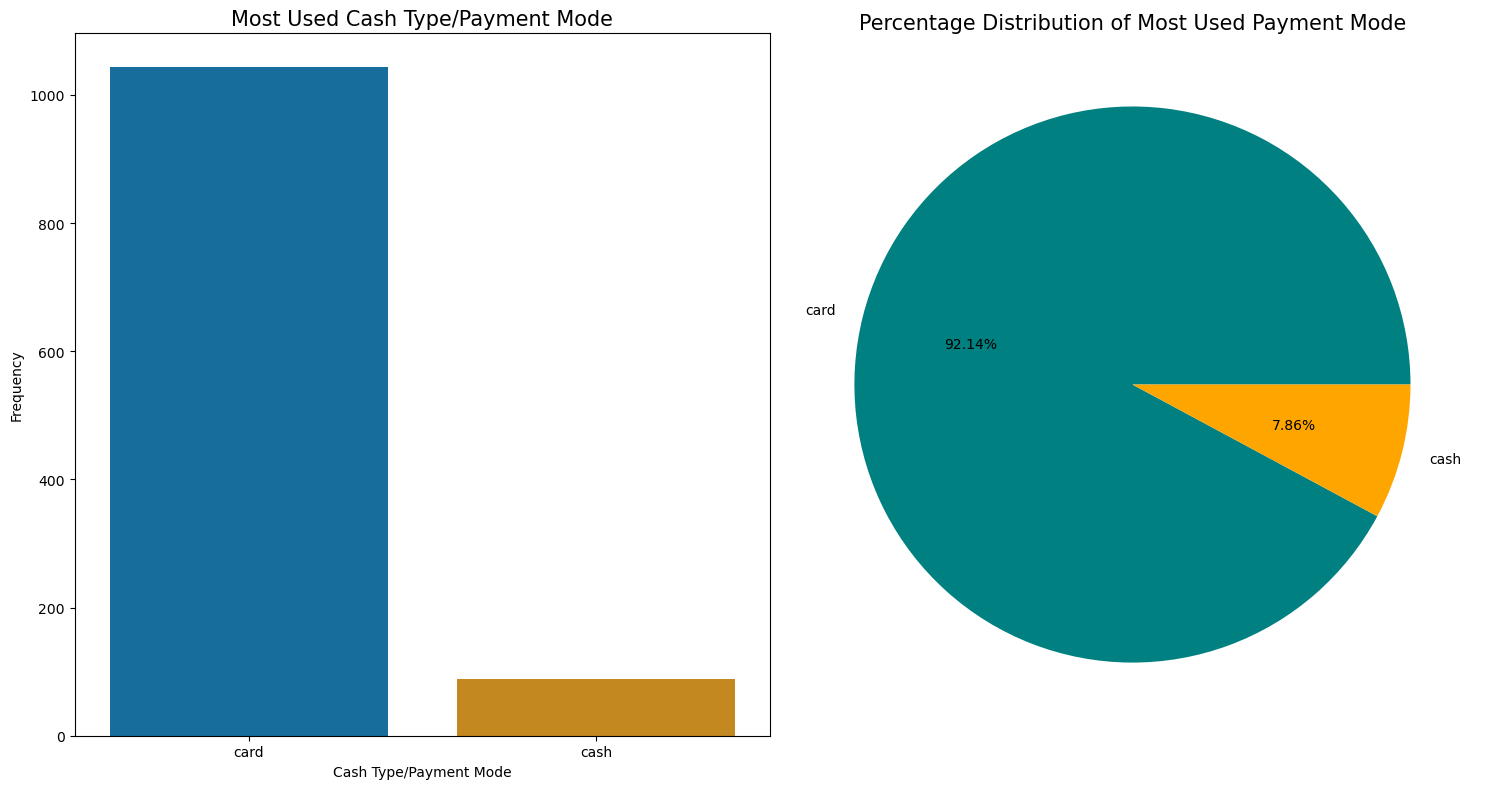

In [24]:
# plotting most preferrd payment mode (count) 
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.barplot(x = payment_type.index, y = payment_type.values, palette = "colorblind")
plt.title("Most Used Cash Type/Payment Mode",fontsize = 15)
plt.xlabel("Cash Type/Payment Mode")
plt.ylabel("Frequency")
plt.tight_layout()

# plotting percentage distribution of most used payment mode
plt.subplot(1,2,2)
plt.pie(payment_type, labels = payment_type.index, autopct = "%.2f%%",colors = ["teal","orange"])
plt.title("Percentage Distribution of Most Used Payment Mode",fontsize = 15)
plt.tight_layout()

plt.show()

- Most used payment mode is via card rather than cash. It's almost 92.14% are card user and rest of all 7.86% are preferred cash payment

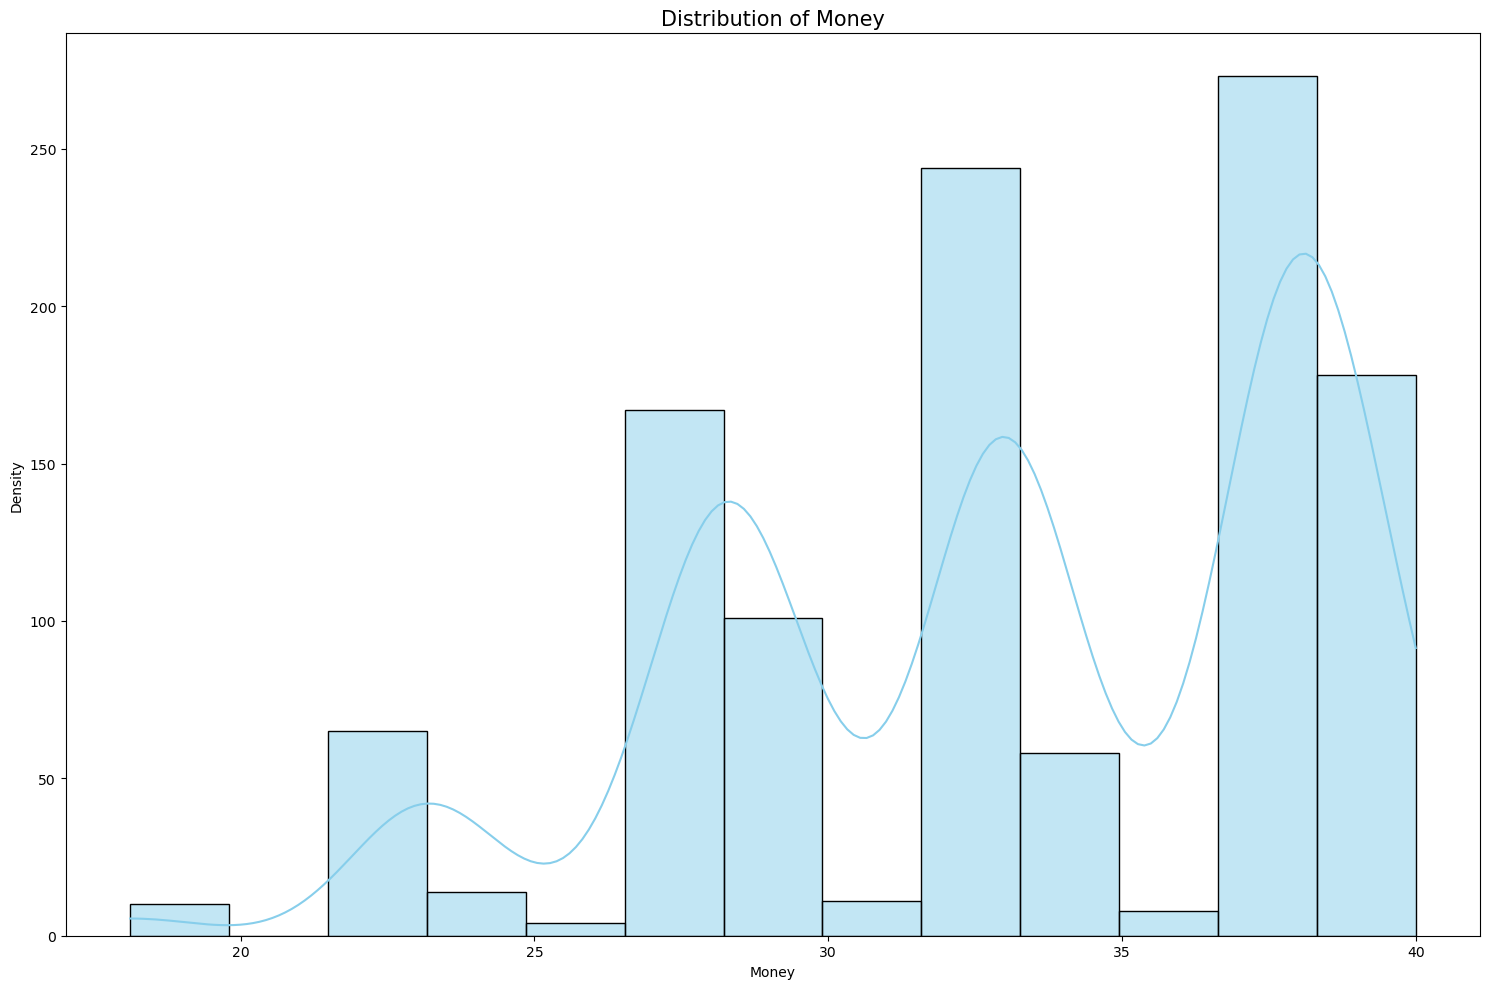

In [26]:
# Plotting distribution of money ; distrubuted in bins 
plt.figure(figsize = (15,10))
sns.histplot(df["money"],kde = True,color = "skyblue")
plt.title("Distribution of Money", fontsize = 15)
plt.xlabel("Money")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

- Most money spend on price range between ``28-38``

In [28]:
# looking for most preferred coffee by customers
coffees = df["coffee_name"].value_counts()
coffees

coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64

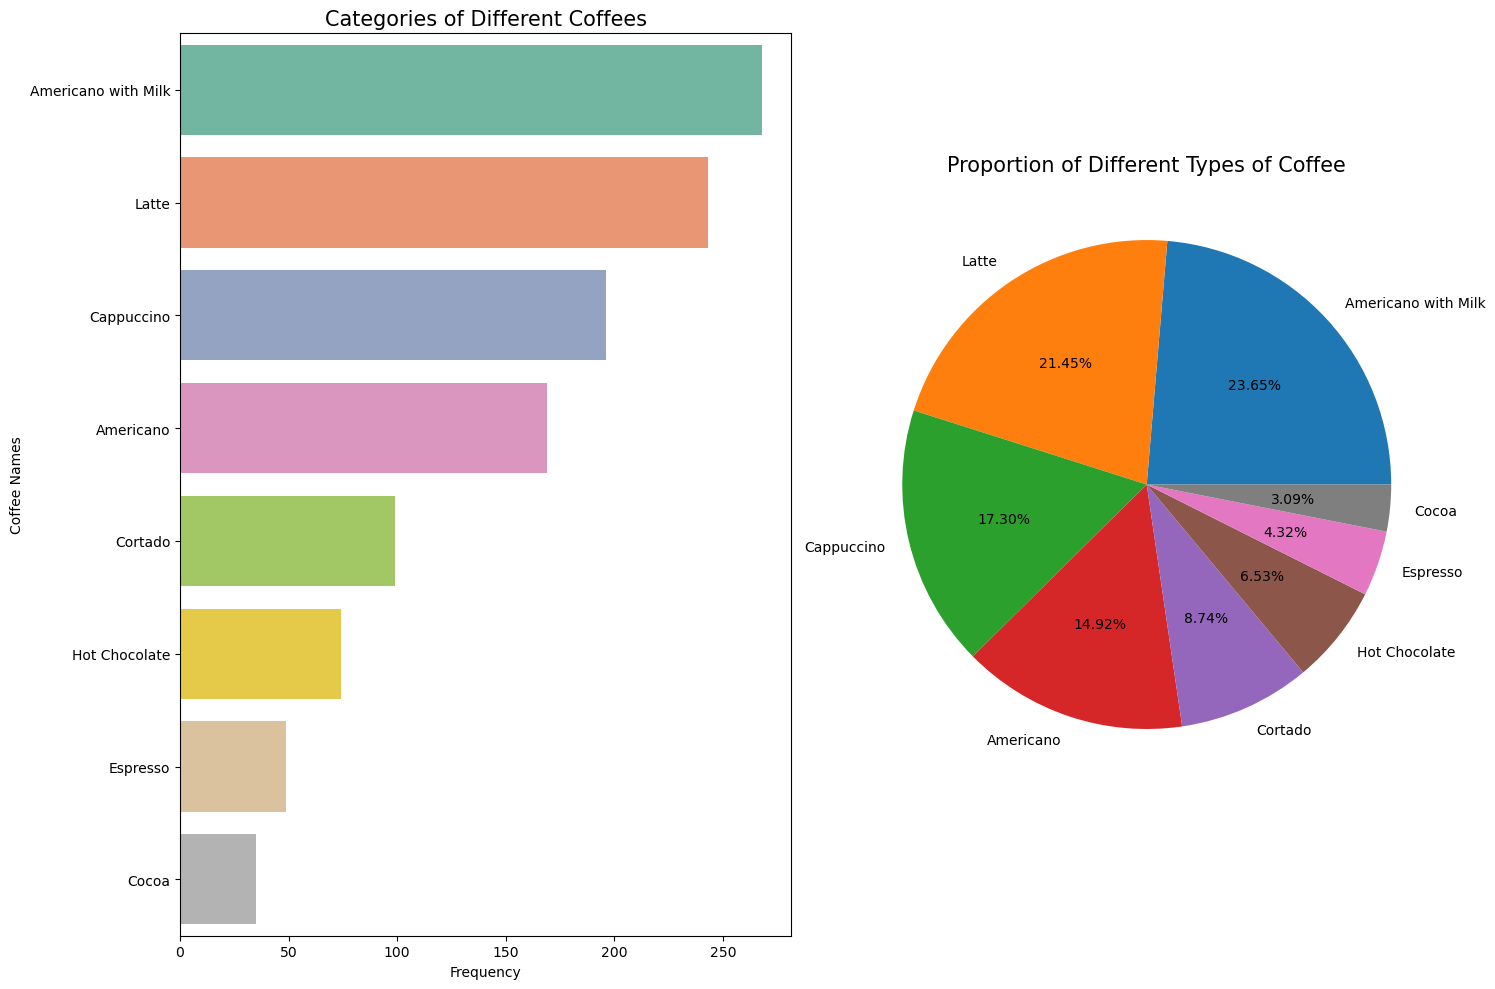

In [29]:
# plotting most preferred coffee by cutomers
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.barplot(x = coffees.values, y = coffees.index, palette = "Set2")
plt.title("Categories of Different Coffees", fontsize = 15)
plt.xlabel("Frequency")
plt.ylabel("Coffee Names")
plt.tight_layout()

# plotting proportion(in %) of preferred coffee by cutomers
plt.subplot(1,2,2)
plt.pie(coffees, labels = coffees.index, autopct = "%.2f%%")
plt.title("Proportion of Different Types of Coffee",fontsize = 15)
plt.tight_layout()

plt.show()

- Most sold coffees are **Americano with milk,** **Laate,** **Cappuccino** and **Americano.** Their proportions are **23.65%**, **21.45%**, **17.30%** and **14.92%**

In [31]:
# looking for coffee in terms of highest sales
coffee_sales = df.groupby("coffee_name")["money"].sum().sort_values(ascending = False)
coffee_sales

coffee_name
Latte                  9009.14
Americano with Milk    8601.94
Cappuccino             7333.14
Americano              4644.54
Hot Chocolate          2778.48
Cortado                2745.08
Cocoa                  1295.94
Espresso               1100.62
Name: money, dtype: float64

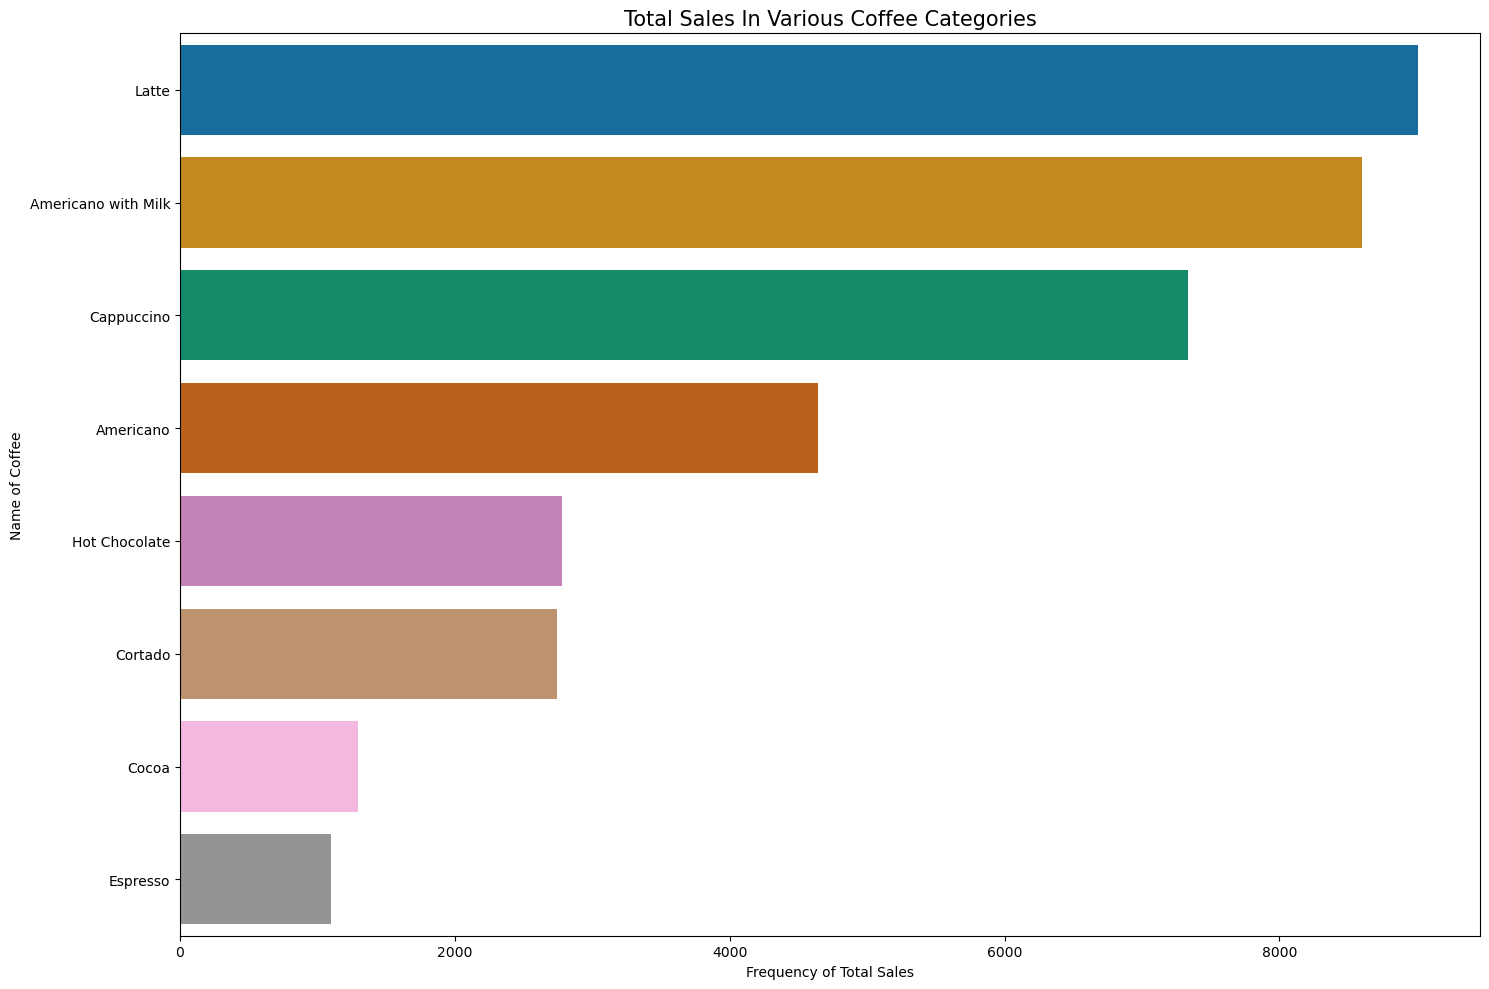

In [32]:
# plotting coffee with highest in sales
plt.figure(figsize = (15,10))
sns.barplot(y = coffee_sales.index, x = coffee_sales.values, palette = "colorblind")
plt.title("Total Sales In Various Coffee Categories",fontsize = 15)
plt.xlabel("Frequency of Total Sales")
plt.ylabel("Name of Coffee")
plt.tight_layout()
plt.show()

- Highest sales of a perticular coffee is **Latte,** **Americano with milk,** **Cappuccino** and **Americano.**

In [34]:
# looking for total sales done by in which payment mode!!
total_transaction = df.groupby("cash_type")["money"].sum()
total_transaction 

cash_type
card    34322.88
cash     3186.00
Name: money, dtype: float64

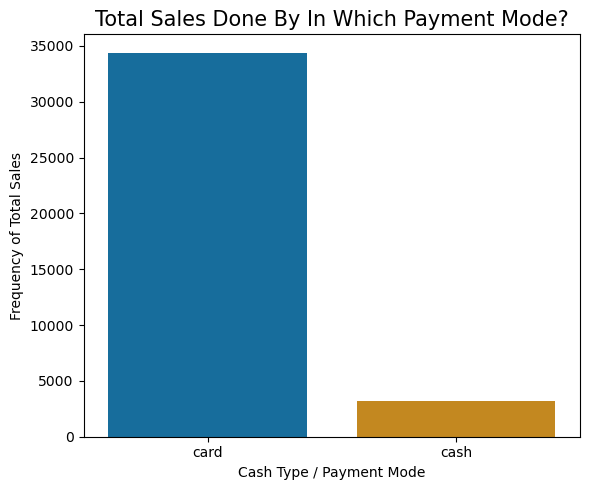

In [35]:
# plotting total sales done by in which payment mode!!
plt.figure(figsize = (6,5))
sns.barplot(x = total_transaction.index, y = total_transaction.values, palette = "colorblind")
plt.title("Total Sales Done By In Which Payment Mode?",fontsize = 15)
plt.xlabel("Cash Type / Payment Mode")
plt.ylabel("Frequency of Total Sales")
plt.tight_layout()
plt.show()

- Most sales are done by via card it's almost ~35k and via cash it's ~3.2k

In [37]:
# checking total monthly sales of coffee
monthly_sales = df.groupby(df["month"])["money"].sum().sort_index()
monthly_sales.index = ["March","April","May","June","July"]

# checking monthly total sold quantities of coffee 
month_qty = df["month"].value_counts().sort_index()
month_qty.index = ["March","April","May","June","July"]

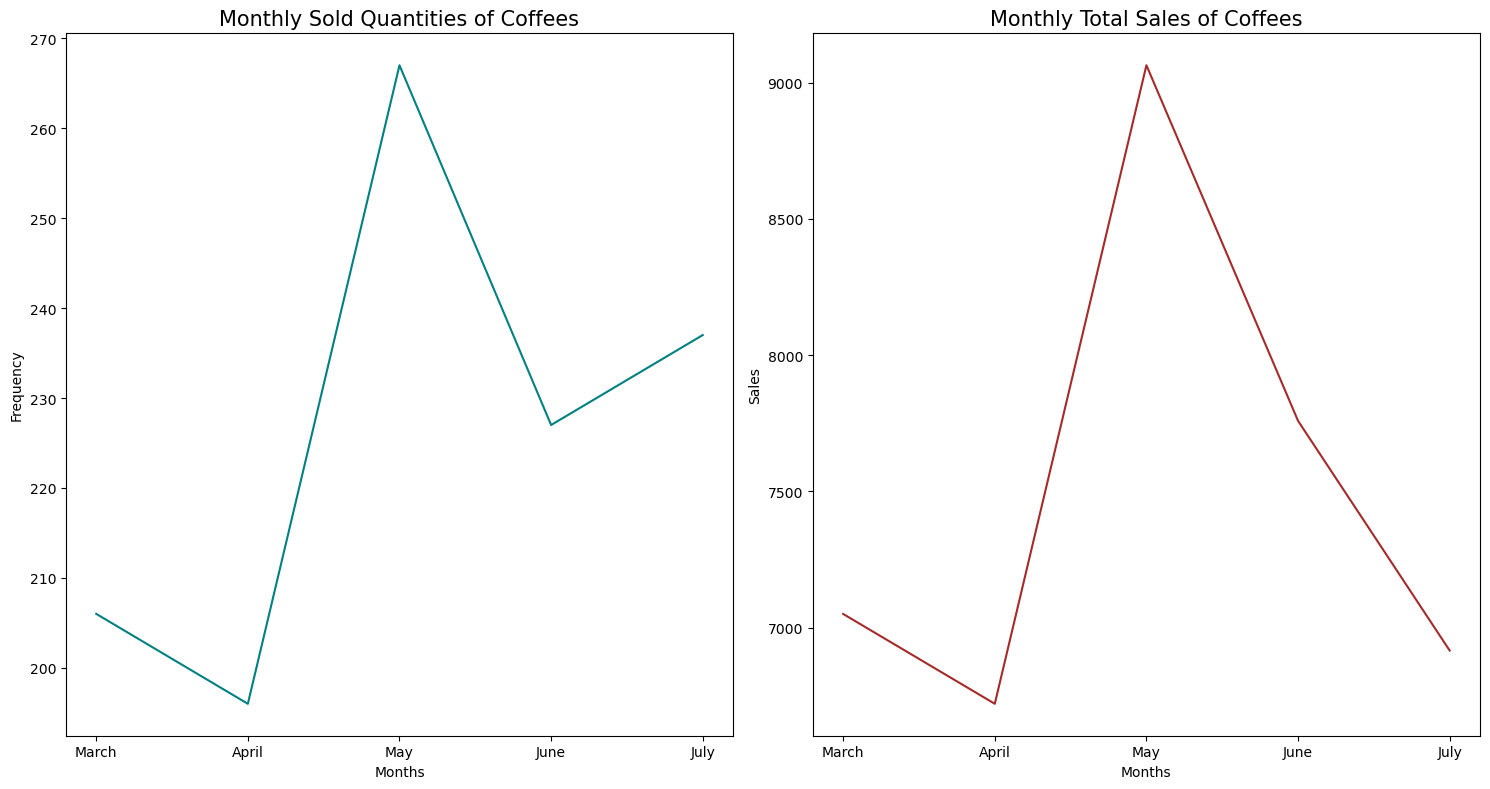

In [38]:
# plotting monthly sold quantity of coffee
plt.figure(figsize = (15,8))

plt.subplot(1,2,1)
sns.lineplot(x = month_qty.index, y = month_qty.values, color = "teal")
plt.title("Monthly Sold Quantities of Coffees", fontsize = 15)
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.tight_layout()

# plotting monthly total sales of coffee
plt.subplot(1,2,2)
sns.lineplot(x = monthly_sales.index, y = monthly_sales.values, color = "brown")
plt.title("Monthly Total Sales of Coffees", fontsize = 15)
plt.xlabel("Months")
plt.ylabel("Sales")
plt.tight_layout()

plt.show()

- From above line chart we can clearly see in **May** is peak month among rest of all, where most number of coffee's quantities sold and sales happened.
- During summer in may month **total sale is 9063.42** and **267 quantities sold** of different types of coffee.

In [40]:
# checking day wise quantity sold of coffee 
day_qty = df['day'].value_counts().sort_index()
# checking day wise total sales of coffee
day_sales = df.groupby('day')['money'].sum().sort_index()

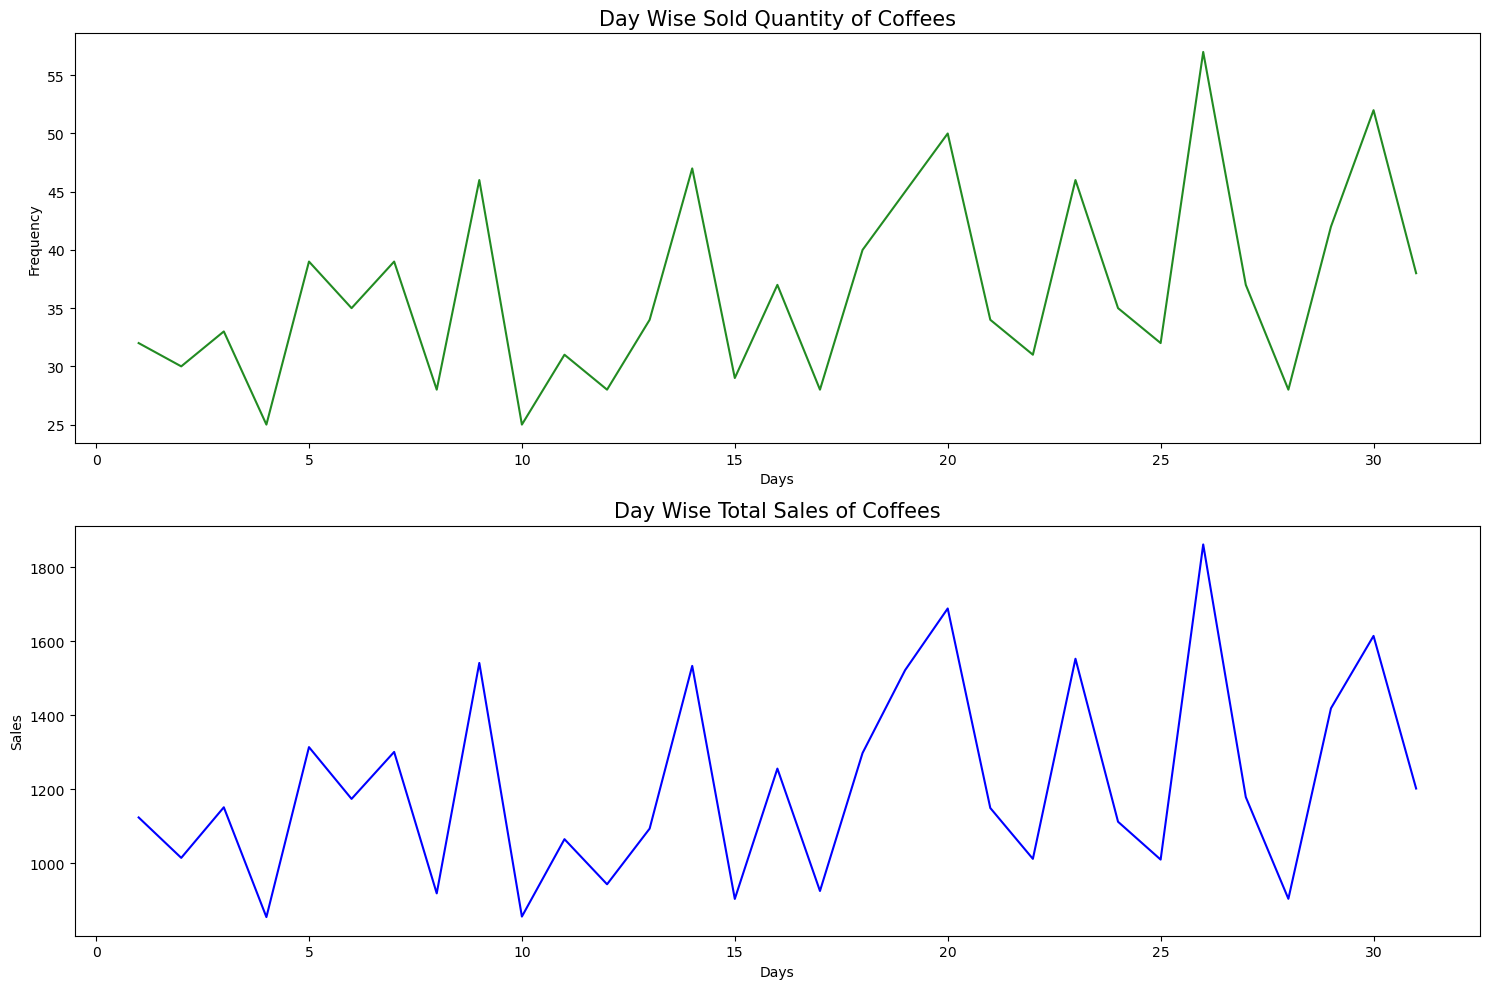

In [41]:
# plotting day wise quantity sold of coffee 
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.lineplot(x = day_qty.index,y = day_qty.values, color = "forestgreen")
plt.title("Day Wise Sold Quantity of Coffees", fontsize = 15)
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.tight_layout()

# plotting day wise total sales of coffee
plt.subplot(2,1,2)
sns.lineplot(x = day_sales.index,y = day_sales.values, color = "blue")
plt.title("Day Wise Total Sales of Coffees", fontsize = 15)
plt.xlabel("Days")
plt.ylabel("Sales")
plt.tight_layout()

plt.show()

- Most number of quantities and sales of coffee is done in **Weekends** and **End of the month.**

In [43]:
# checking hourly total quantities sold of coffee 
hrs_qty = df['hour'].value_counts().sort_index()
# checking hourly total sales of coffee
hrs_sales = df.groupby('hour')['money'].sum().sort_index()

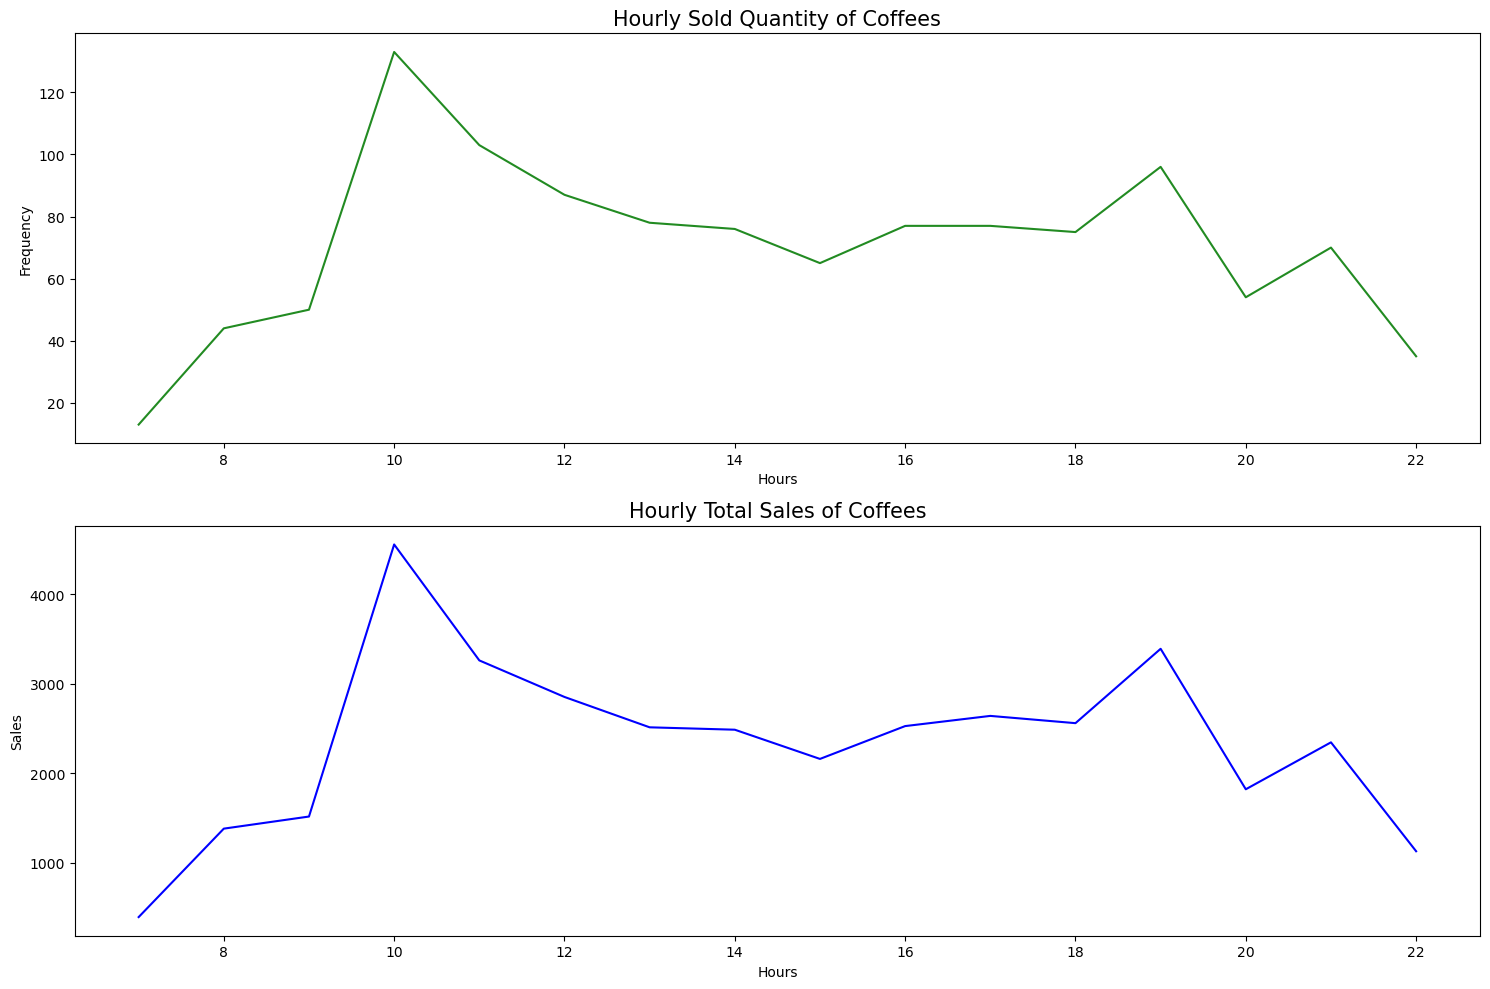

In [44]:
# plotting hourly total quantities sold of coffee 
plt.figure(figsize = (15,10))

plt.subplot(2,1,1)
sns.lineplot(x = hrs_qty.index,y = hrs_qty.values, color = "forestgreen")
plt.title("Hourly Sold Quantity of Coffees", fontsize = 15)
plt.xlabel("Hours")
plt.ylabel("Frequency")
plt.tight_layout()

# plotting hourly total sales of coffee
plt.subplot(2,1,2)
sns.lineplot(x = hrs_sales.index,y = hrs_sales.values, color = "blue")
plt.title("Hourly Total Sales of Coffees", fontsize = 15)
plt.xlabel("Hours")
plt.ylabel("Sales")
plt.tight_layout()

plt.show()

- Most number of quantities and sales of coffee is done in **Morning hours** and **Evening hours.**

In [46]:
# types of coffee qty sold month wise
mtly_sale = df.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns = {'date':'count'}).pivot(index='month',columns='coffee_name',values='count')
mtly_sale.index=["March","April","May","June","July"]
mtly_sale

coffee_name,Americano,Americano with Milk,Cappuccino,Cocoa,Cortado,Espresso,Hot Chocolate,Latte
March,36,34,20,6,30,10,22,48
April,35,42,43,6,19,7,13,31
May,48,58,55,9,17,8,14,58
June,14,69,46,5,19,10,14,50
July,36,65,32,9,14,14,11,56


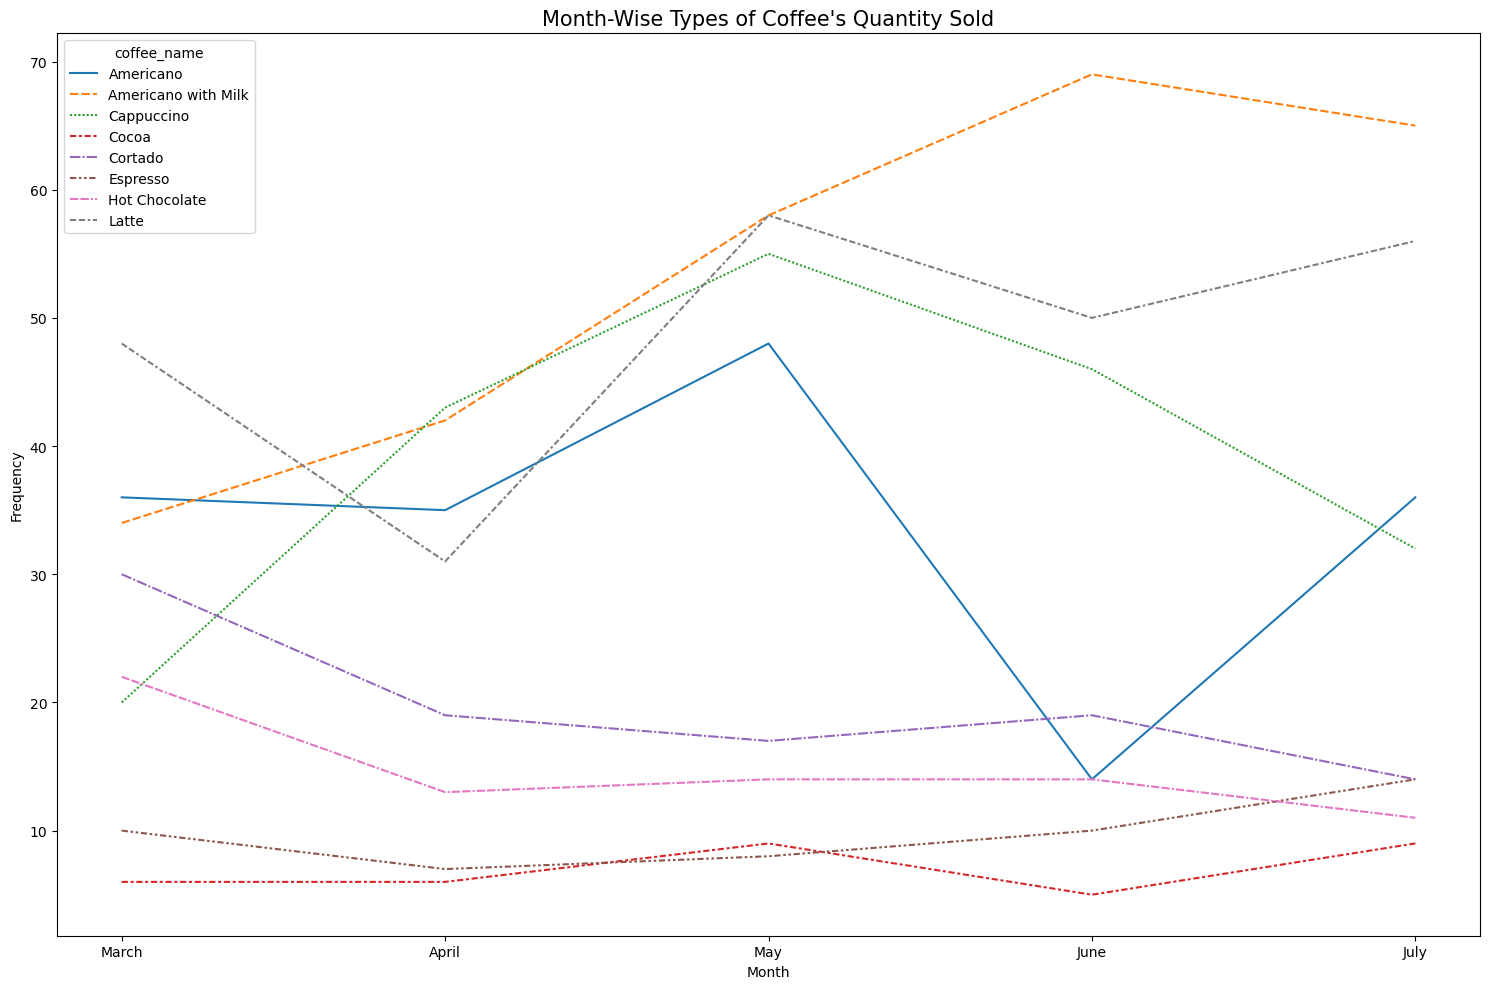

In [47]:
# plotting monthly types of coffeee's qty sold
plt.figure(figsize = (15,10))
sns.lineplot(mtly_sale)
plt.title("Month-Wise Types of Coffee's Quantity Sold", fontsize = 15) 
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

- **Most sold** coffee's are **Americano with milk,** **Latte** and **Cappuccion**
- **Lowest sold** coffee's are **Cocoa** and **Espresso**
- **Latte** and **Americano** are most likely to **Selling more** because of their **Upward trend.**

## Feature Engineering

In [50]:
# dropping columns that not useful for modeling
df.drop(['date', 'datetime','card', 'year'],axis = 1,inplace = True)

In [51]:
df.head()

,cash_type,money,coffee_name,month,day,hour
0,card,38.7,Latte,3,1,10
1,card,38.7,Hot Chocolate,3,1,12
2,card,38.7,Hot Chocolate,3,1,12
3,card,28.9,Americano,3,1,13
4,card,38.7,Latte,3,1,13


In [52]:
# Encode categorical variable 
df = pd.get_dummies(df,columns = ["cash_type","coffee_name"],drop_first = True).astype(int)

In [53]:
df.head()

,money,month,day,hour,cash_type_cash,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,38,3,1,10,0,0,0,0,0,0,0,1
1,38,3,1,12,0,0,0,0,0,0,1,0
2,38,3,1,12,0,0,0,0,0,0,1,0
3,28,3,1,13,0,0,0,0,0,0,0,0
4,38,3,1,13,0,0,0,0,0,0,0,1


In [54]:
# Encode numerical variable
scaler = StandardScaler()
df[["month","day","hour"]] = scaler.fit_transform(df[["month","day","hour"]])

In [55]:
df.head()

,money,month,day,hour,cash_type_cash,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte
0,38,-1.498484,-1.770972,-1.115052,0,0,0,0,0,0,0,1
1,38,-1.498484,-1.770972,-0.625190,0,0,0,0,0,0,1,0
2,38,-1.498484,-1.770972,-0.625190,0,0,0,0,0,0,1,0
3,28,-1.498484,-1.770972,-0.380259,0,0,0,0,0,0,0,0
4,38,-1.498484,-1.770972,-0.380259,0,0,0,0,0,0,0,1


## Modeling

#### Linear Regression

In [58]:
# assigning dependent and independent variables

X = df.drop("money",axis = 1)      # Independent
y = df["money"]                    # Dependent

In [59]:
# splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 77)

In [60]:
# Applying Model ; Linear regression 
model = LinearRegression()

# Model Fitting
model.fit(X_train,y_train)

# Model prediction ; predicting the testing data
y_pred = model.predict(X_test)

In [61]:
# Evaluation -> Linear Regression
print(f"r2_score :{r2_score(y_test,y_pred)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"MSE : {mean_squared_error(y_test,y_pred)}")
print(f"MAE : {mean_absolute_error(y_test,y_pred)}")

r2_score :0.9470023861080932
RMSE : 1.1593258904513317
MSE : 1.3440365202707734
MAE : 0.9597534352361837


#### Random Forest Regressor

In [63]:
# Applying model ; random forest regressor 
rf = RandomForestRegressor(random_state=77)

# Fitting model
rf.fit(X_train,y_train)

# predicting the testing data
y_pred_rf = rf.predict(X_test)

In [64]:
# Evaluation -> Random Forest Regressor
print(f"r2_score :{r2_score(y_test,y_pred_rf)}")
print(f"RMSE : {np.sqrt(mean_squared_error(y_test,y_pred_rf))}")
print(f"MSE : {mean_squared_error(y_test,y_pred_rf)}")
print(f"MAE : {mean_absolute_error(y_test,y_pred_rf)}")

r2_score :0.9929388502547333
RMSE : 0.4231702101977704
MSE : 0.17907302679882517
MAE : 0.08694199706314251


## Evaluation

In [66]:
result_df = pd.DataFrame({"R-Square" : [r2_score(y_test,y_pred),r2_score(y_test,y_pred_rf)],
                          "RMSE" : [np.sqrt(mean_squared_error(y_test,y_pred)),np.sqrt(mean_squared_error(y_test,y_pred_rf))],
                          "MSE" : [mean_squared_error(y_test,y_pred),mean_squared_error(y_test,y_pred_rf)],
                          "MAE" : [mean_absolute_error(y_test,y_pred),mean_absolute_error(y_test,y_pred_rf)]},
                          index = ["Linear Regression","Random Forest Regressor"])    
result_df

,R-Square,RMSE,MSE,MAE
Linear Regression,0.947002,1.159326,1.344037,0.959753
Random Forest Regressor,0.992939,0.423170,0.179073,0.086942


- The ``Linear Regression model`` achieved an **R² of 0.947**, indicating that **94.7%** of the variation in money spent can be explained by the selected features.  
  The **RMSE of 1.1593** shows that predictions are close to the actual values, reflecting **good accuracy and fit**.  
  The **low MSE: 1.34** and **MAE: 0.96** further confirm **consistent and reliable performance**.

- The ``Random Forest Regressor`` performed even better, achieving an **R² of 0.9929**, meaning it explains **99.3%** of the variation in money spent.  
  The **RMSE of 0.4231** indicates **very high precision**, and the **MSE: 0.179** and **MAE: 0.0869** show **minimal error** between predicted and actual values.  
- It shows that **Random Forest captured complex, non-linear relationships more effectively than Linear Regression**.


## Insight:

- Most customers prefer **card payments (92%)**, showing a **digital-first trend** in coffee transactions.  
- **Latte**, **Americano with Milk**, and **Cappuccino** are the most popular beverages, contributing the **majority of sales revenue**.  
- **May** recorded the **highest total sales**, likely influenced by **seasonal demand or promotions**.  
- Sales are highest during **morning and evening hours** and peak towards **weekends and month-end**, indicating **customer rush patterns**.  
- The **Linear Regression model** achieved an excellent fit (**R² = 0.947**), but the **Random Forest Regressor** further improved accuracy (**R² = 0.993**) with significantly lower error values.  
- This confirms that coffee sales depend on **non-linear relationships** between **time-based features** (hour, month, day) and **coffee types**.

Both models perform strongly, but Random Forest Regressor provides superior accuracy and lower error, making it the best model for predicting coffee sales.

## References

>Dataset: *Coffee Sales*  
>Source: Kaggle  
>[URL of Dataset](https://www.kaggle.com/datasets/ihelon/coffee-sales)  
>Accessed on: October 2025  